##Submission 1
####Nama : Muhammad Ridho Abdillah
####Email : ridhoabdi101@gmail.com
####Kelas : Dicoding - Belajar Pengembangan Machine Learning

###Informasi Dataset
Dataset ini diperoleh dari website Kaggle yang berjudul Emotions in text. Berikut adalah link dataset yang digunakan pada proyek ini:
https://www.kaggle.com/datasets/ishantjuyal/emotions-in-text

###Membuat Model NLP dengan Tensorflow

In [35]:
import pandas as pd
df = pd.read_csv('Emotion_final.csv')
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [36]:
# proses one-hot-encoding
category = pd.get_dummies(df.Emotion)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Emotion')
df_baru

,Text,anger,fear,happy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,0,1,0,0,0,0
21455,Successive state elections have seen the gover...,0,1,0,0,0,0
21456,Vincent was irritated but not dismay,0,1,0,0,0,0
21457,Kendall-Hume turned back to face the dismayed ...,0,1,0,0,0,0


In [37]:
# mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values
text = df_baru['Text'].values
label = df_baru[['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']]

In [38]:
# membagi data untuk training dan data untuk testing
from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

In [39]:
# mengubah setiap kata pada dataset ke dalam bilangan numerik dengan fungsi Tokenizer. Setelah tokenisasi selesai, tahap selanjutnya membuat mengonversi setiap sampel menjadi sequence.
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_latih)
tokenizer.fit_on_texts(text_test)

sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [40]:
# Untuk arsitektur model menggunakan layer Embedding dengan dimensi embedding sebesar 16, serta dimensi dari input sebesar nilai num_words pada objek tokenizer
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
# mengimplementasikan callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [42]:
# melatih model dengan memanggil fungsi fit
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
537/537 - 25s - loss: 1.3898 - accuracy: 0.3903 - val_loss: 1.1401 - val_accuracy: 0.5315 - 25s/epoch - 47ms/step
Epoch 2/30
537/537 - 5s - loss: 0.7764 - accuracy: 0.7161 - val_loss: 0.6968 - val_accuracy: 0.7752 - 5s/epoch - 10ms/step
Epoch 3/30
537/537 - 6s - loss: 0.3960 - accuracy: 0.8685 - val_loss: 0.4867 - val_accuracy: 0.8397 - 6s/epoch - 10ms/step
Epoch 4/30

Akurasi telah mencapai >90%!
537/537 - 6s - loss: 0.2553 - accuracy: 0.9153 - val_loss: 0.4289 - val_accuracy: 0.8607 - 6s/epoch - 11ms/step


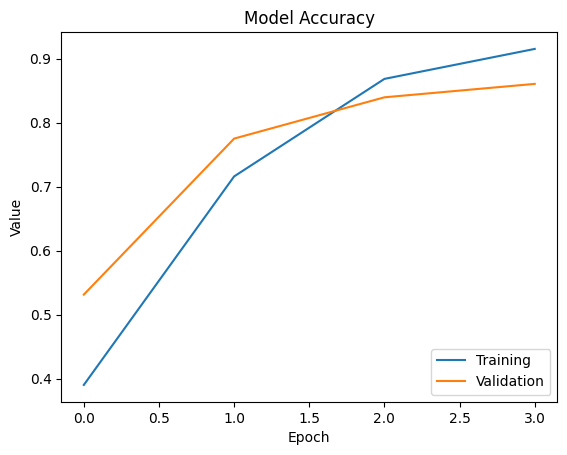

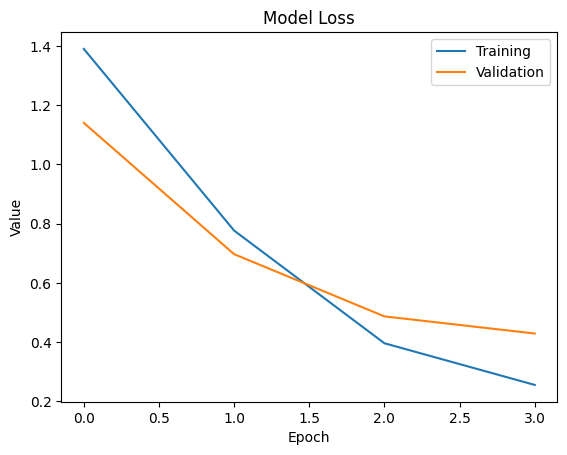

In [43]:
# membuat plot loss dan akurasi pada saat training dan validation
from matplotlib import pyplot as plt

# model accuracy
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

# model loss
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()